In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'/home/luffy02/AI_projects/Boston_house_price_prediction/house-prices-advanced-regression-techniques'

In [3]:
ls


Boston_house_price_prediction.ipynb  data_description.txt   test.csv
boston_test_data.ipynb               sample_submission.csv  train.csv


In [4]:
df = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.shape

(1460, 81)

In [8]:
df.isnull().sum()
testdf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

## Handling Null values 

 - lets check the null values in the form of graph

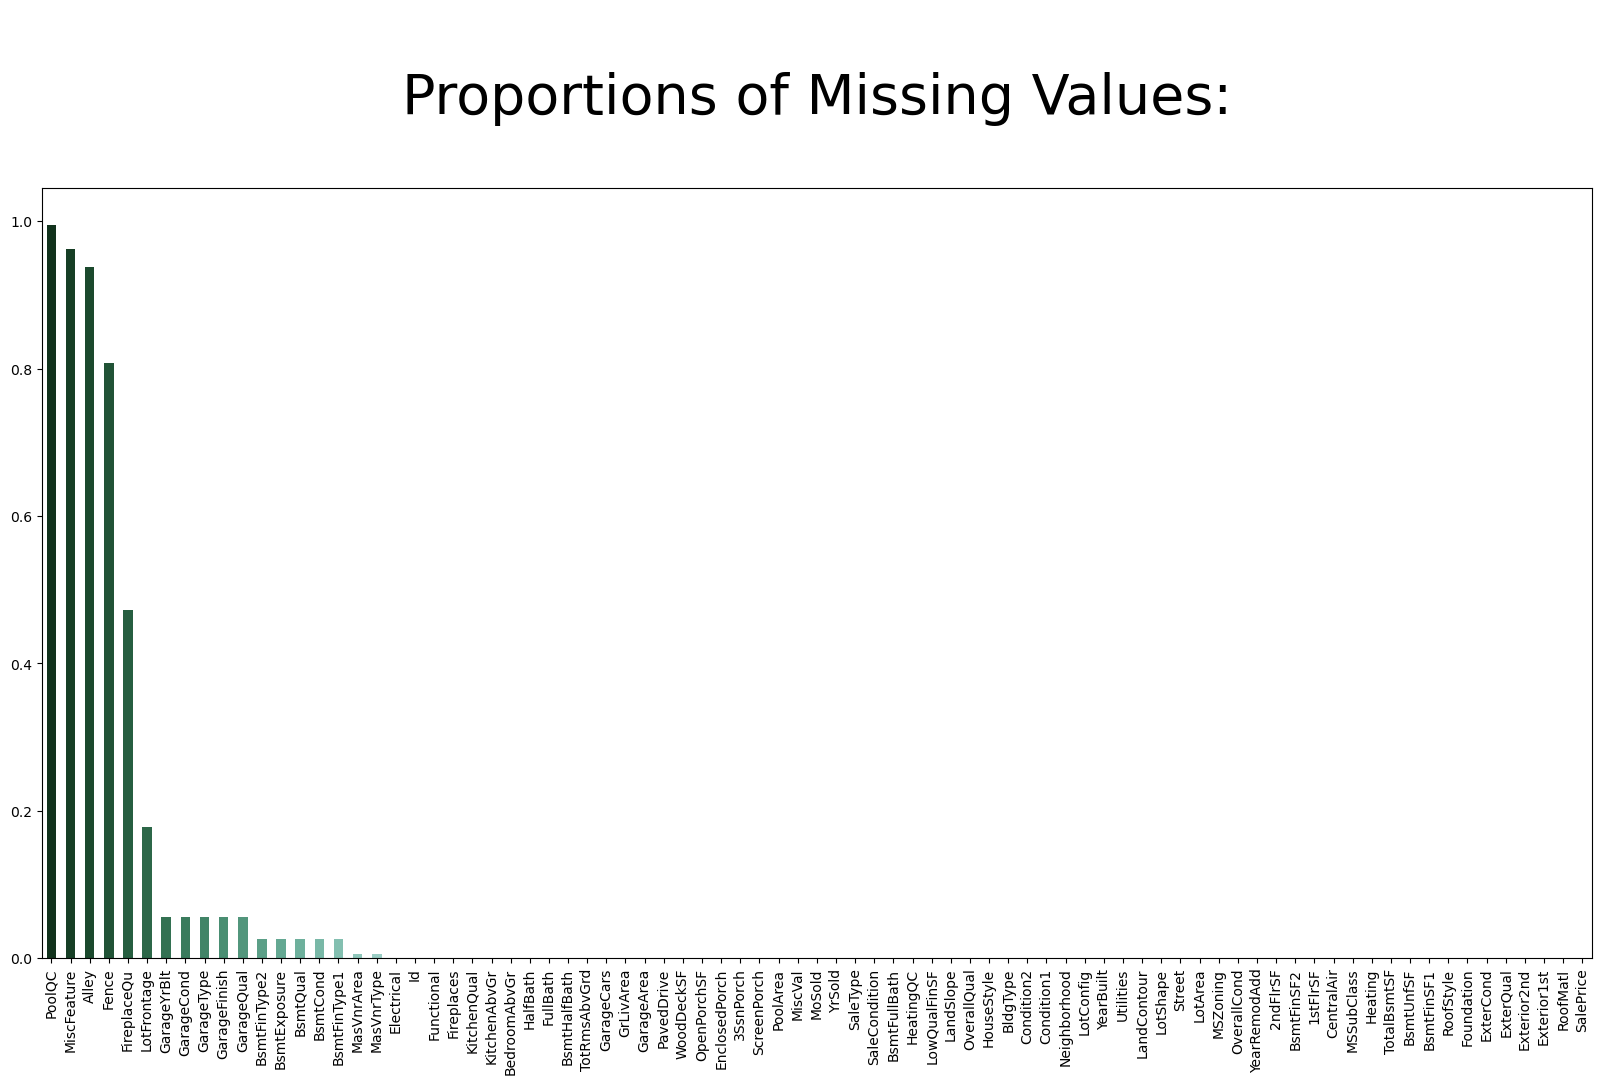

In [11]:
d = ((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
# Here we are plotting null values in range of 0-1. It means y axis range is 0-1.
# If bar graph show 0.5 null values that means there are 50% null values in that particular column.
# Hence we are dividing number of null values of each column with total number of rows 

d.plot(kind = 'bar',
       color = sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

## clear null in objects

In [12]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean()) 

In [13]:
testdf['LotFrontage'] = testdf['LotFrontage'].fillna(testdf['LotFrontage'].mean()) 

In [14]:
df.drop('Alley', axis =1, inplace = True)

In [15]:
testdf.drop('Alley', axis =1, inplace = True)

In [16]:
df.drop('GarageYrBlt',axis =1 ,inplace =True)

In [17]:
testdf.drop('GarageYrBlt',axis =1 ,inplace =True)

In [18]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])
    

In [19]:
for i in testdf.columns:
    testdf[i] = testdf[i].fillna(testdf[i].mode()[0])

In [20]:
df.drop('Id',axis=1,inplace =True)

In [21]:
testdf.drop('Id',axis=1,inplace =True)

In [22]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

<AxesSubplot:>

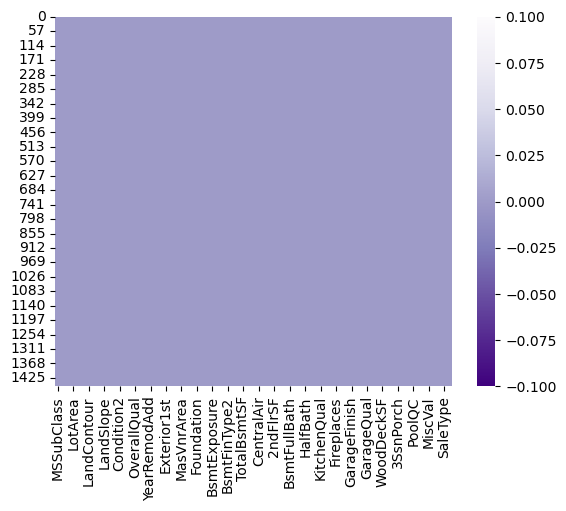

In [23]:
sns.heatmap(testdf.isnull(), cmap='Purples_r')

<AxesSubplot:>

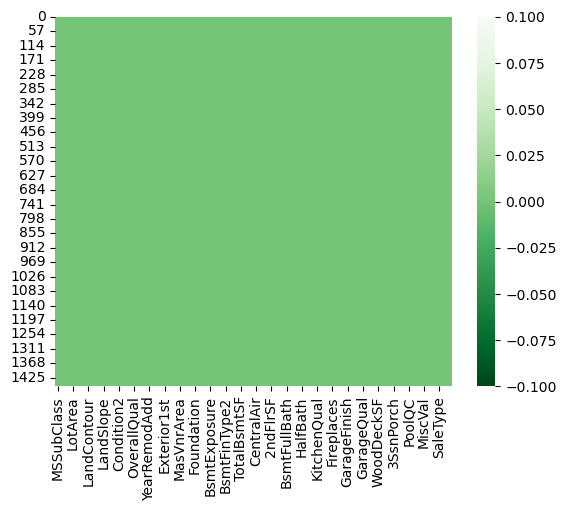

In [24]:
sns.heatmap(df.isnull(), cmap='Greens_r')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()

In [27]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = encoder.fit_transform(df[i])

In [28]:
for i in testdf.columns:
    if testdf[i].dtypes == 'object':
        testdf[i] = encoder.fit_transform(testdf[i])

In [29]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,2,2,2,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,2,2,2,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,2,2,2,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,2,2,2,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,2,2,2,0,12,2008,8,4,250000


In [30]:
testdf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,120,0,0,2,2,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,0,0,0,2,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,0,0,0,2,2,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,0,0,0,2,2,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,144,0,0,2,2,0,1,2010,8,4


## model

In [41]:
x_train = df.drop('SalePrice', axis = 1)
y_train = df['SalePrice']

In [43]:
import xgboost as xgb
xgb_classifier = xgb.XGBRegressor(learning_rate= 0.001)
xgb_classifier.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
import pickle 
filename = 'finalized_model.pkl'
pickle.dump(xgb_classifier, open(filename, 'wb'))

In [46]:
y_pred = xgb_classifier.predict(testdf)

In [47]:
y_pred

array([174311.1 , 177264.77, 181133.2 , ..., 177264.77, 176292.5 ,
       184694.88], dtype=float32)

In [48]:
## create sample submissive

pred = pd.DataFrame(y_pred)

In [49]:
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis =1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv', index = False)